In [1]:
# IMPORT LIBRARIES
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
from ucimlrepo import fetch_ucirepo 
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import fetch_openml

In [2]:
# TASK 1

# fetch dataset 
adult = fetch_ucirepo(id=2) 
  
# data (as pandas dataframes) 
X = adult.data.features 
y = adult.data.targets 
  
# metadata 
print(adult.metadata) 
  
# variable info
print(adult.variables) 

{'uci_id': 2, 'name': 'Adult', 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult', 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv', 'abstract': 'Predict whether income exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Mon Aug 07 2023', 'dataset_doi': '10.24432/C5XW20', 'creators': ['Barry Becker', 'Ronny Kohavi'], 'intro_paper': None, 'additional_info': {'summary': 'Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the following conditions: ((AAG

In [3]:
# TASK 2

# show first few rows of dataset
X.head()
# show info about dataset such as data types, non-null counts, and memory usage
X.info()
# show summary statistics of dataset
X.describe()
# show shape of dataset
X.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
dtypes: int64(6), object(8)
memory usage: 5.2+ MB


(48842, 14)

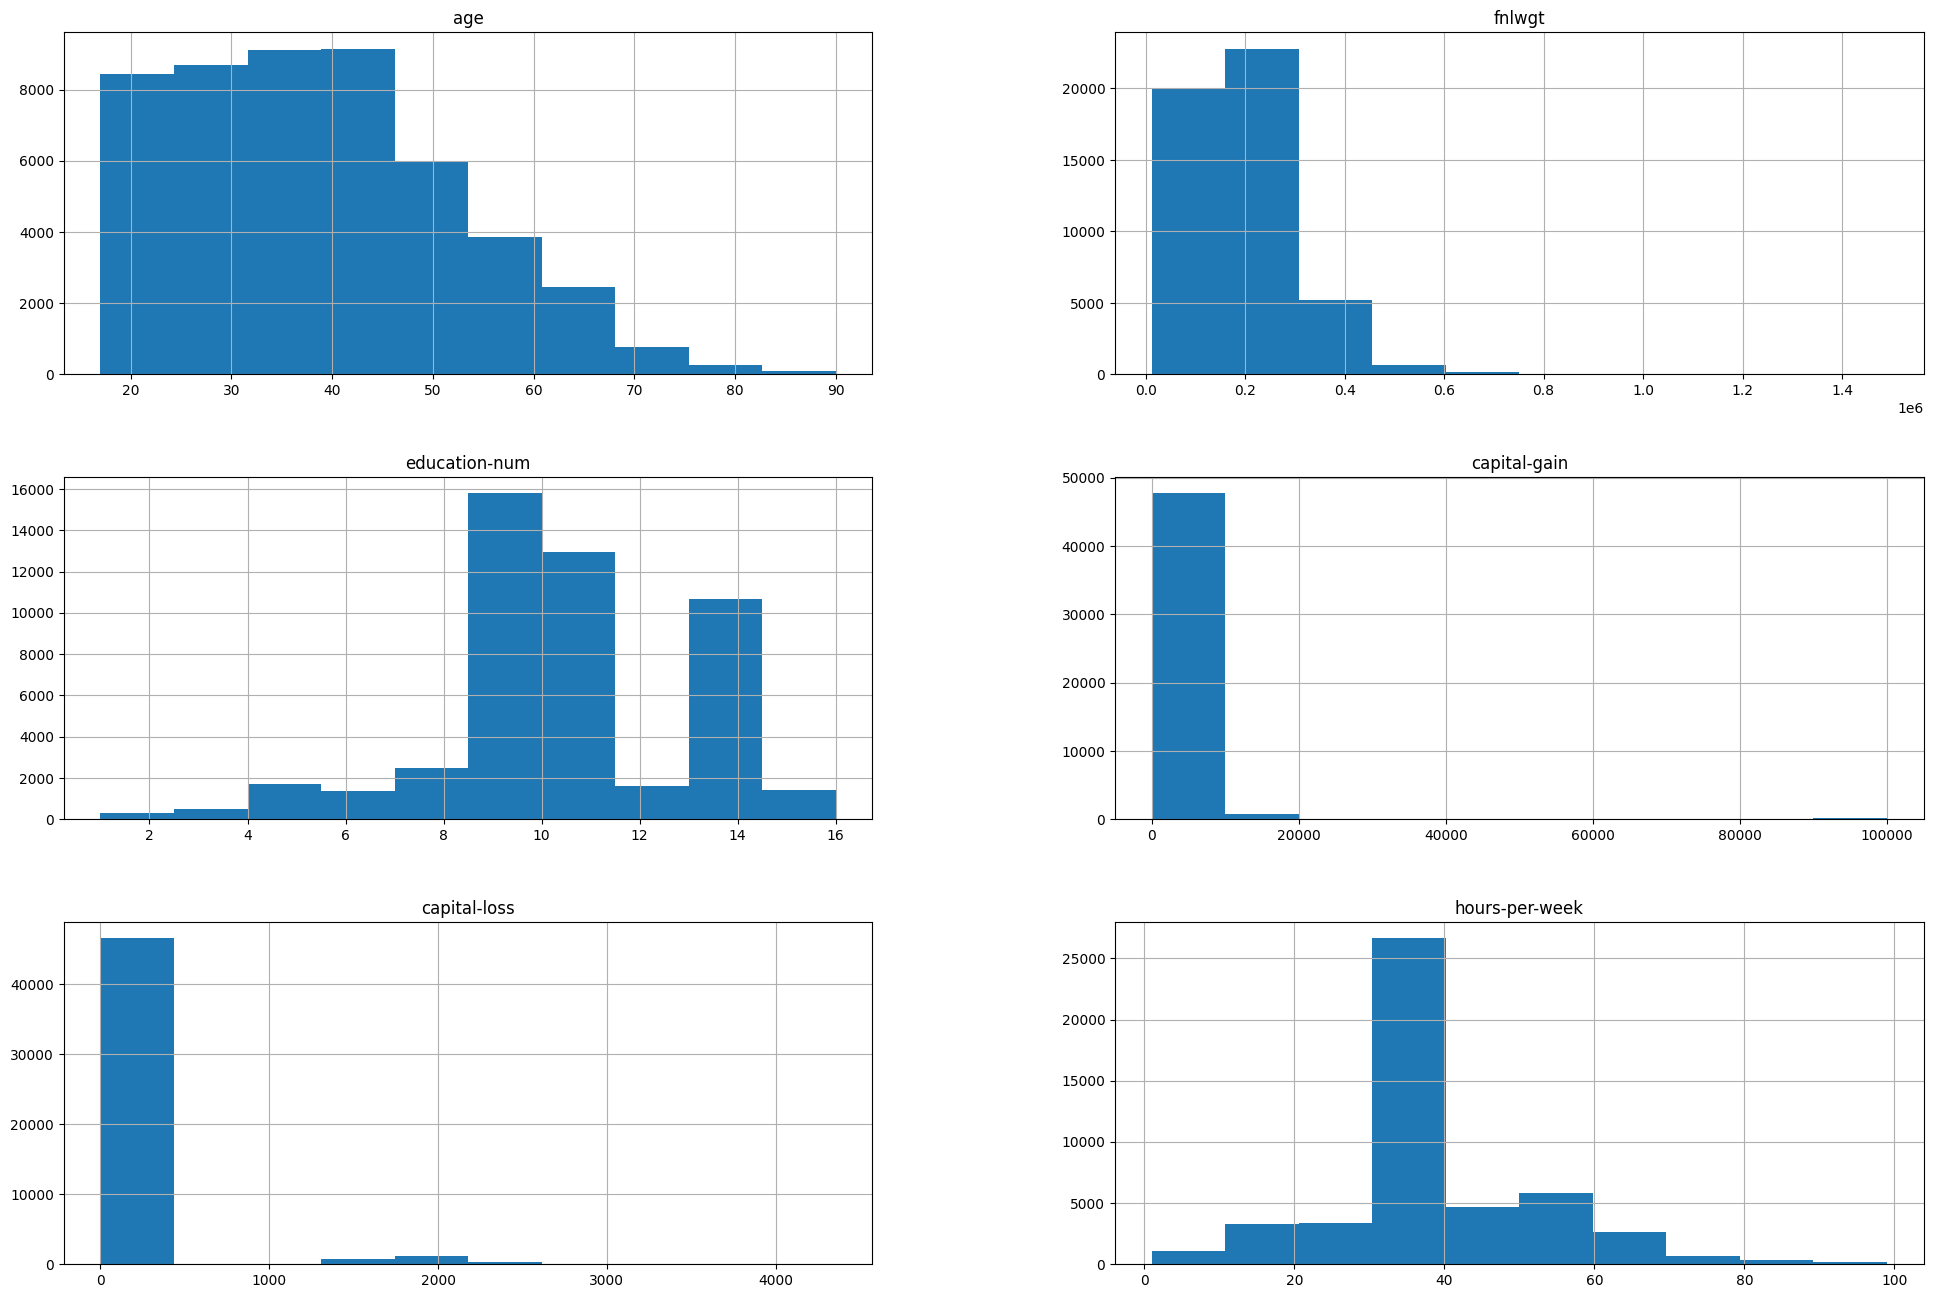

In [4]:
# TASK 2.1

# plot histograms for each feature in dataset
X.hist(figsize=(24, 16))
plt.show()

In [5]:
# TASK 3

# count number of missing values represented as '?'
(X == '?').sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
dtype: int64

In [6]:
# TASK 4

# replace missing values represented as '?' with NaN
X = X.replace('?',np.nan)
# show info about dataset after replacing missing values
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       46043 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      46033 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  47985 non-null  object
dtypes: int64(6), object(8)
memory usage: 5.2+ MB


In [7]:
# TASK 5

# create the cat and num columns
# get a list of column names from the 'X' DataFrame that are of numerical data types.
# get a list of column names from the 'X' DataFrame that are not of numerical data types.

num_cols = X.select_dtypes(include='number').columns.to_list()
cat_cols = X.select_dtypes(exclude='number').columns.to_list()

# create pipelines for numeric and categorical columns
num_pipeline = make_pipeline(SimpleImputer(strategy='mean'), StandardScaler())
cat_pipeline = make_pipeline(SimpleImputer(strategy='most_frequent'), OneHotEncoder(sparse_output=False)) 

# use ColumnTransformer to set the estimators and transformations

preprocessing = ColumnTransformer([('num', num_pipeline, num_cols),
                                   ('cat', cat_pipeline, cat_cols)],
                                    remainder='passthrough'
                                 )

num_cols
cat_cols

# show the pipeline
preprocessing

# apply the preprocessing pipeline on the dataset
X_prepared = preprocessing.fit_transform(X)

# scikit-learn strips the column headers, so just add them back on afterward
feature_names=preprocessing.get_feature_names_out()
X_prepared = pd.DataFrame(data=X_prepared, columns=feature_names)

X_prepared

print (X_prepared.columns)

print (X_prepared.shape)

Index(['num__age', 'num__fnlwgt', 'num__education-num', 'num__capital-gain',
       'num__capital-loss', 'num__hours-per-week',
       'cat__workclass_Federal-gov', 'cat__workclass_Local-gov',
       'cat__workclass_Never-worked', 'cat__workclass_Private',
       ...
       'cat__native-country_Portugal', 'cat__native-country_Puerto-Rico',
       'cat__native-country_Scotland', 'cat__native-country_South',
       'cat__native-country_Taiwan', 'cat__native-country_Thailand',
       'cat__native-country_Trinadad&Tobago',
       'cat__native-country_United-States', 'cat__native-country_Vietnam',
       'cat__native-country_Yugoslavia'],
      dtype='object', length=105)
(48842, 105)


In [8]:
# TASK 6

# show counts of unique values in target variable
y["income"].value_counts()

income
<=50K     24720
<=50K.    12435
>50K       7841
>50K.      3846
Name: count, dtype: int64

In [19]:
# TASK 7

# remove periods at end of income values
y['income'] = y['income'].str.replace('.', '')
# show counts of unique values in cleaned target variable
y['income'].value_counts()

C:\Users\khanb\AppData\Local\Temp\ipykernel_41328\1246639749.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['income'] = y['income'].str.replace('.', '')


income
<=50K    37155
>50K     11687
Name: count, dtype: int64

In [10]:
# TASK 8

# split dataset into training and testing sets
Y = y['income']
# show shapes of training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_prepared, Y, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(39073, 105) (39073,) (9769, 105) (9769,)


In [11]:
# TASK 9

# train an SVM model on training set
model_svm = SVC(kernel='poly', C=0.1, gamma=1)
model_svm.fit(X_train.iloc[:10000], y_train.iloc[:10000].values.ravel())

SVC(C=0.1, gamma=1, kernel='poly')

In [12]:
# TASK 9.1

# test the trained model on test set and display the classification report
y_predict = model_svm.predict(X_test)
print(f'classification_report for C = 0.1')
print(classification_report(y_test, y_predict))

classification_report for C = 0.1
              precision    recall  f1-score   support

       <=50K       0.57      0.70      0.63      4936
      <=50K.       0.29      0.21      0.24      2478
        >50K       0.43      0.40      0.42      1562
       >50K.       0.21      0.12      0.15       793

    accuracy                           0.48      9769
   macro avg       0.37      0.36      0.36      9769
weighted avg       0.45      0.48      0.46      9769



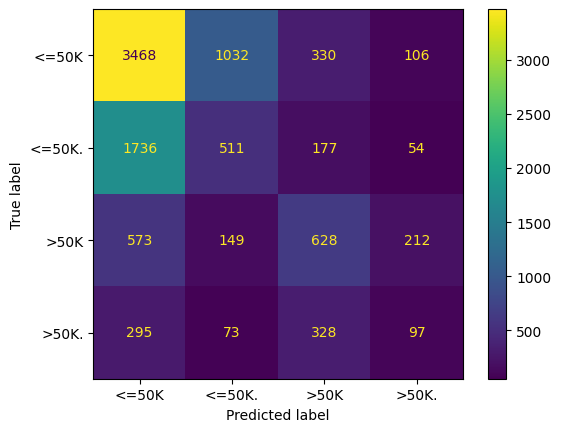

In [13]:
# TASK 9.2

# show confusion matrix for test results
ConfusionMatrixDisplay.from_predictions(y_test, y_predict)

In [14]:
# TASK 10/10.1

# split dataset into training, validation, and testing sets
X_train, X_validation_test, y_train, y_validation_test = train_test_split(X_prepared, y, test_size=0.4, random_state=42)
X_validation, X_test, y_validation, y_test = train_test_split(X_validation_test, y_validation_test, test_size=0.5, random_state=42)
# show shapes of training, validation, and testing sets
print(X_train.shape, y_train.shape, X_validation.shape, y_validation.shape, X_test.shape, y_test.shape)

(29305, 105) (29305, 1) (9768, 105) (9768, 1) (9769, 105) (9769, 1)


In [18]:
# TASK 10.2

# code author luisguiserrano
# use GridSearchCV to find best hyperparameters for SVM
from sklearn.model_selection import GridSearchCV

svm_parameters = {'kernel': ['rbf'],
                  'C': [0.01, 0.1, 1 , 10],
                  'gamma': [0.01, 1, 10]
                }
svm = SVC()
svm_gs = GridSearchCV(estimator = svm,
                      param_grid = svm_parameters)
svm_gs.fit(X_train.iloc[:10000], y_train.iloc[:10000].values.ravel())

# get the best estimator from the grid search
svm_winner = svm_gs.best_estimator_
# show accuracy score on the validation set using the best parameters
svm_winner.score(X_validation, y_validation)

0.564086814086814